In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 

In [2]:
X, y = dataset["data"], dataset["target"]

In [3]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [4]:
#y

In [5]:
#Y_new[:,100]

In [6]:
#y[0,100]

In [7]:
m = 60000  
m_test = X.shape[0] - m

#shuffle part

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

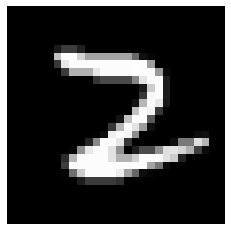

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [9]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [11]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [12]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  12.22594940305396
Epoch 100 cost:  0.854875912462017
Epoch 200 cost:  0.6555804262966218
Epoch 300 cost:  0.5762020699178404
Epoch 400 cost:  0.5358671908129711
Epoch 500 cost:  0.5105396396739256
Epoch 600 cost:  0.49106060190876866
Epoch 700 cost:  0.47538846109661803
Epoch 800 cost:  0.46289506928237056
Epoch 900 cost:  0.451239943384326
Epoch 1000 cost:  0.4431094037300643
Epoch 1100 cost:  0.43426914432442565
Epoch 1200 cost:  0.42758808943620324
Epoch 1300 cost:  0.42428873544996293
Epoch 1400 cost:  0.41504956944347937
Epoch 1500 cost:  0.4144259210505714
Epoch 1600 cost:  0.4053189248665901
Epoch 1700 cost:  0.4038405386089286
Epoch 1800 cost:  0.40194409984297885
Epoch 1900 cost:  0.3962049819055746
Final cost: 0.3973236459774191


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 906    0   21   16    5   23   17    5   13    8]
 [   0 1103   15    3    5    4    2    5   15    6]
 [  11    7  853   31    6   15   15   28   22    5]
 [  10    6   27  852    5   46    3   19   30   14]
 [   1    0   18    3  828   16   12   12   19   84]
 [  23    2    5   37    3  695   27    1   55   17]
 [  10    4   30    7   24   20  871    0   18    9]
 [   8    1   15   22    6   16    1  889   11   51]
 [  11   11   42   27   27   46   10    9  770   15]
 [   0    1    6   12   73   11    0   60   21  800]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1014
           1       0.97      0.95      0.96      1158
           2       0.83      0.86      0.84       993
           3       0.84      0.84      0.84      1012
           4       0.84      0.83      0.84       993
           5       0.78      0.80      0.79       865
           6       0.91      0.88      0.89       993
           7       0.86      0.87   